# Data Wrangling for Airport Flights Delays and Cancellations Analysis

## Load flights, airlines, airports data

In [1]:
import pandas as pd

In [44]:
from matplotlib import pyplot as plt

In [45]:
%matplotlib inline

In [2]:
import numpy as np

In [46]:
import seaborn as sns

In [3]:
flights = pd.read_csv("flights.csv")

/Users/ajey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
airlines = pd.read_csv("airlines.csv")

In [5]:
airports = pd.read_csv("airports.csv")

In [6]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [7]:
flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
delays = flights[['ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIRLINE_DELAY']]

In [10]:
delays = delays.fillna(0)

In [13]:
delays.head(10)

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE
0,ANC,-11.0,-22.0,0.0,1
1,LAX,-8.0,-9.0,0.0,1
2,SFO,-2.0,5.0,0.0,1
3,LAX,-5.0,-9.0,0.0,1
4,SEA,-1.0,-21.0,0.0,1
5,SFO,-5.0,8.0,0.0,1
6,LAS,-6.0,-17.0,0.0,1
7,LAX,14.0,-10.0,0.0,1
8,SFO,-11.0,-13.0,0.0,1
9,LAS,3.0,-15.0,0.0,1


In [12]:
delays['FLIGHT_INSTANCE'] = 1

In [14]:
delaysgroup = delays.groupby("ORIGIN_AIRPORT").sum()

In [15]:
delaysgroup

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE
ORIGIN_AIRPORT,,,,
10135,2277.0,1718.0,1400.0,226
10136,613.0,-1179.0,732.0,189
10140,9700.0,546.0,3093.0,1712
10141,119.0,40.0,19.0,67
10146,779.0,971.0,740.0,82
10154,640.0,715.0,471.0,28
10155,-564.0,-1718.0,17.0,140
10157,1367.0,1045.0,10.0,113
10158,4.0,-1118.0,20.0,232


In [16]:
delaysgroup['DEPARTURE_DELAY'] = delaysgroup['DEPARTURE_DELAY']/delaysgroup['FLIGHT_INSTANCE']

In [17]:
delaysgroup['ARRIVAL_DELAY'] = delaysgroup['ARRIVAL_DELAY']/delaysgroup['FLIGHT_INSTANCE']

In [18]:
delaysgroup['AIRLINE_DELAY'] = delaysgroup['AIRLINE_DELAY']/delaysgroup['FLIGHT_INSTANCE']

In [19]:
delaysgroup

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE
ORIGIN_AIRPORT,,,,
10135,10.075221,7.601770,6.194690,226
10136,3.243386,-6.238095,3.873016,189
10140,5.665888,0.318925,1.806659,1712
10141,1.776119,0.597015,0.283582,67
10146,9.500000,11.841463,9.024390,82
10154,22.857143,25.535714,16.821429,28
10155,-4.028571,-12.271429,0.121429,140
10157,12.097345,9.247788,0.088496,113
10158,0.017241,-4.818966,0.086207,232


In [21]:
delays = delays.rename(columns={"ORIGIN_AIRPORT":"IATA_CODE"})

In [22]:
delays.head(10)

,IATA_CODE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE
0,ANC,-11.0,-22.0,0.0,1
1,LAX,-8.0,-9.0,0.0,1
2,SFO,-2.0,5.0,0.0,1
3,LAX,-5.0,-9.0,0.0,1
4,SEA,-1.0,-21.0,0.0,1
5,SFO,-5.0,8.0,0.0,1
6,LAS,-6.0,-17.0,0.0,1
7,LAX,14.0,-10.0,0.0,1
8,SFO,-11.0,-13.0,0.0,1
9,LAS,3.0,-15.0,0.0,1


In [24]:
delaysgroup = delays.groupby("IATA_CODE").sum()

In [25]:
delaysgroup.head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE
IATA_CODE,,,,
10135,2277.0,1718.0,1400.0,226
10136,613.0,-1179.0,732.0,189
10140,9700.0,546.0,3093.0,1712
10141,119.0,40.0,19.0,67
10146,779.0,971.0,740.0,82
10154,640.0,715.0,471.0,28
10155,-564.0,-1718.0,17.0,140
10157,1367.0,1045.0,10.0,113
10158,4.0,-1118.0,20.0,232


In [26]:
delaysgroup['DEPARTURE_DELAY'] = delaysgroup['DEPARTURE_DELAY']/delaysgroup['FLIGHT_INSTANCE']

In [27]:
delaysgroup['ARRIVAL_DELAY'] = delaysgroup['ARRIVAL_DELAY']/delaysgroup['FLIGHT_INSTANCE']

In [28]:
delaysgroup['AIRLINE_DELAY'] = delaysgroup['AIRLINE_DELAY']/delaysgroup['FLIGHT_INSTANCE']

In [29]:
delaysgroup.head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE
IATA_CODE,,,,
10135,10.075221,7.601770,6.194690,226
10136,3.243386,-6.238095,3.873016,189
10140,5.665888,0.318925,1.806659,1712
10141,1.776119,0.597015,0.283582,67
10146,9.500000,11.841463,9.024390,82
10154,22.857143,25.535714,16.821429,28
10155,-4.028571,-12.271429,0.121429,140
10157,12.097345,9.247788,0.088496,113
10158,0.017241,-4.818966,0.086207,232


In [30]:
apsumm = airports[['IATA_CODE','AIRPORT']]

In [31]:
apsumm.head(10)

,IATA_CODE,AIRPORT
0,ABE,Lehigh Valley International Airport
1,ABI,Abilene Regional Airport
2,ABQ,Albuquerque International Sunport
3,ABR,Aberdeen Regional Airport
4,ABY,Southwest Georgia Regional Airport
5,ACK,Nantucket Memorial Airport
6,ACT,Waco Regional Airport
7,ACV,Arcata Airport
8,ACY,Atlantic City International Airport
9,ADK,Adak Airport


In [38]:
dlygrp = pd.merge(delaysgroup,apsumm,on='IATA_CODE')

In [33]:
apsumm.head(10)

,IATA_CODE,AIRPORT
0,ABE,Lehigh Valley International Airport
1,ABI,Abilene Regional Airport
2,ABQ,Albuquerque International Sunport
3,ABR,Aberdeen Regional Airport
4,ABY,Southwest Georgia Regional Airport
5,ACK,Nantucket Memorial Airport
6,ACT,Waco Regional Airport
7,ACV,Arcata Airport
8,ACY,Atlantic City International Airport
9,ADK,Adak Airport


In [37]:
delaysgroup.head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE,IATA_CODE
IATA_CODE,,,,,
10135,10.075221,7.601770,6.194690,226,10135
10136,3.243386,-6.238095,3.873016,189,10136
10140,5.665888,0.318925,1.806659,1712,10140
10141,1.776119,0.597015,0.283582,67,10141
10146,9.500000,11.841463,9.024390,82,10146
10154,22.857143,25.535714,16.821429,28,10154
10155,-4.028571,-12.271429,0.121429,140,10155
10157,12.097345,9.247788,0.088496,113,10157
10158,0.017241,-4.818966,0.086207,232,10158


In [36]:
delaysgroup['IATA_CODE'] = delaysgroup.index

In [39]:
dlygrp = pd.merge(delaysgroup,apsumm,on='IATA_CODE')

In [40]:
dlygrp

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE,IATA_CODE,AIRPORT
0,8.697010,6.120493,3.726913,2274,ABE,Lehigh Valley International Airport
1,5.553027,3.134392,3.631172,2329,ABI,Abilene Regional Airport
2,8.781732,4.700188,3.095717,19192,ABQ,Albuquerque International Sunport
3,9.980626,9.791356,7.239940,671,ABR,Aberdeen Regional Airport
4,8.788813,7.501142,5.688356,876,ABY,Southwest Georgia Regional Airport
5,16.189024,9.335366,5.058943,492,ACK,Nantucket Memorial Airport
6,7.286600,4.444789,2.401365,1612,ACT,Waco Regional Airport
7,11.562121,7.532576,1.902273,1320,ACV,Arcata Airport
8,9.835106,8.624860,3.266237,3572,ACY,Atlantic City International Airport
9,9.885417,10.114583,0.593750,96,ADK,Adak Airport


In [43]:
dlygrp.sort_values('DEPARTURE_DELAY',ascending=False)

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_DELAY,FLIGHT_INSTANCE,IATA_CODE,AIRPORT
154,28.510000,22.860000,6.000000,100,ILG,Wilmington Airport
219,25.907317,12.980488,2.375610,205,MVY,Martha's Vineyard Airport
147,22.903614,8.518072,1.831325,83,HYA,Barnstable Municipal Airport
293,17.566265,18.144578,1.927711,83,STC,St. Cloud Regional Airport
231,17.130909,13.760000,1.018182,275,OTH,Southwest Oregon Regional Airport (North Bend ...
133,16.948052,21.480519,2.870130,77,GST,Gustavus Airport
137,16.547904,4.796407,9.835329,334,GUM,Guam International Airport
19,16.244526,14.192027,4.445536,3562,ASE,Aspen-Pitkin County Airport
5,16.189024,9.335366,5.058943,492,ACK,Nantucket Memorial Airport
57,15.947368,8.726316,0.868421,190,CEC,Del Norte County Airport (Jack McNamara Field)


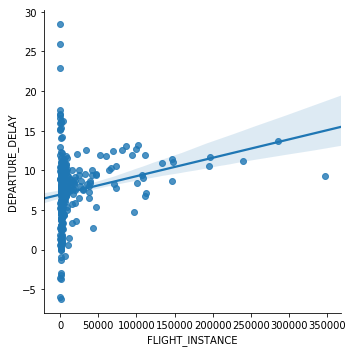

In [48]:
sns.lmplot(x='FLIGHT_INSTANCE',y='DEPARTURE_DELAY',data=dlygrp)

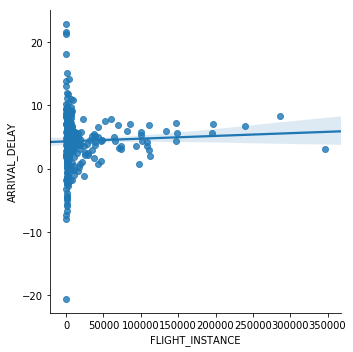

In [49]:
sns.lmplot(x='FLIGHT_INSTANCE',y='ARRIVAL_DELAY',data=dlygrp)

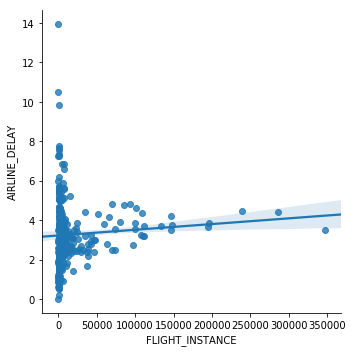

In [50]:
sns.lmplot(x='FLIGHT_INSTANCE',y='AIRLINE_DELAY',data=dlygrp)

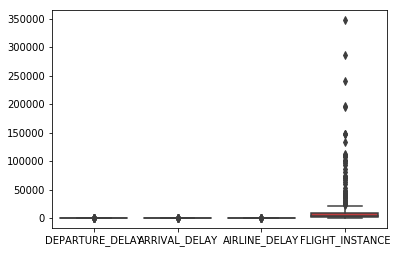

In [51]:
sns.boxplot(data=dlygrp)

In [52]:
bplot = dlygrp[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIRLINE_DELAY']]

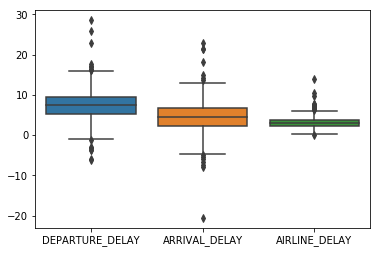

In [53]:
sns.boxplot(data=bplot)